# Applied Statistics - Tasks

**Author: Cecilia Pastore**

---

## **Table of content** <a class="anchor" id="Table_of_content"></a>


* [Introduction](#Introduction)
* [Task 1: Permutations and Combinations](#task1)
* [Task 2: numpy's Normal Distribution](#task2)
    * [2.1: Generate a Random distribution with mean ith mean 10.0 and standard deviation 3.0](#2.1)
    * [2.2: Perform the Shapiro-Wilk and Kolmogorov-Smirnov tests for normality](#2.2)
* [Conclusion On Part 2: Rainfall and temperature in Ireland](#Conclusion2)
* [References](#References)


#### **INTRODUCTION** <a class="anchor" id="Introduction"></a>

The following project has been formulated as Project Number Two for the subject 'Programming for Data Analysis' at Atlantic Technological University, Galway. The project assignment can be reviewed below before delving into the project itself.

### **Task 1: Permutations and Combinations** <a class="anchor" id="task1"></a>

---

**Task assignement**

>Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.
>
>Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.
>
>Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.
>
>Would you accept two errors? Explain.

First, we can import the necessary library.

In [20]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# print in tabulate format 
# https://pypi.org/project/tabulate/
from tabulate import tabulate

#### **1.1: The lady tasting tea experiment by Ronald Fisher** <a class="anchor" id="1.1"></a>

This task is inspired by **The Lady Tasting Tea** experiment by Ronald Fisher [[]](https://www.studocu.com/en-ca/messages/question/4373250/in-the-second-weeks-lecture-i-explained-the-lady-tasting-tea-experiment-i-said-that-if-the-lady). The experiment arose from a claim made by a lady named Muriel Bristol [[]](https://en.wikipedia.org/wiki/Lady_tasting_tea), who asserted that she could tell whether milk or tea was added first to a cup. To test whether Muriel had special abilities, Fisher designed an experiment using 8 cups: 4 made with milk first and 4 with tea first, arranged randomly. Fisher aimed to test the **null hypothesis (H₀)**: that Muriel could not distinguish between the two methods, and any correct identification would be purely due to random chance.

#### Total Possible Arrangements
In the **Lady Tasting Tea** experiment, the first step is to calculate the total number of ways to arrange the cups. There are 8 cups in total: 4 with milk added first, and 4 with tea added first. This is a **combination** problem because we are choosing which 4 out of the 8 cups will have milk first, without regard to the order in which the cups are arranged.

The combination formula is:

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!} \quad \text{and for } n = 8, k = 4, \quad \binom{8}{4} = \frac{8!}{4!(8-4)!} = \frac{8 \times 7 \times 6 \times 5}{4 \times 3 \times 2 \times 1} = 70
$$

So, there are **70 possible ways** to arrange the 8 cups with 4 cups of milk-first and 4 cups of tea-first.

#### Testing the Null Hypothesis (H₀)

Fisher wanted to test whether Muriel's ability to correctly identify the cups was due to chance or if it was statistically significant. Under the **null hypothesis (H₀)**, we assume that Muriel cannot distinguish between the two methods, meaning her guesses are random. Therefore, the probability of guessing a milk-first cup correctly is:

$$
P(\text{correct}) = \frac{4}{8} = 0.5
$$

Since there are 4 cups with milk first and 4 cups with tea first, her chance of guessing correctly for each cup is 50%.

#### Binomial Distribution

Now, the probability of Muriel making **k** correct guesses out of 4 can be calculated, assuming she is guessing randomly. To do this, fisher use the  **binomial distribution**, which models the probability of a certain number of successes (correct guesses) in a fixed number of independent trials (the 4 cups). The formula for the binomial distribution is:

$$
P(k) = \binom{4}{k} \left(\frac{1}{2}\right)^4
$$

Where:
- $P(k)$ is the probability of Muriel making exactly $k$ correct guesses out of 4 cups,
- $\binom{4}{k}$ is the number of ways to choose $k$ correct cups from the 4,
- $\left( \frac{1}{2} \right)^4$ represents the probability of guessing correctly 4 times, since each guess has a 50% chance of being correct.

The possible values for \( k \) are 0, 1, 2, 3, or 4, meaning we can calculate the probability of getting 0, 1, 2, 3, or 4 correct guesses out of 4.

If we chose $k$ equal to 0 here the probability of chosing non of the correct cups in the example is: 

For example, the probability of guessing **0** correct cups is:

$$
P(0) = \binom{4}{0} \left(\frac{1}{2}\right)^4 = 1 \times \frac{1}{16} = 0.0625
$$

Similarly, we can calculate the probability for each value of $k$:

- $(P(0) = 0.0625)$ - 6.25% chance of getting 0 correct guesses
- $( P(1) = 0.25 )$ - 25% chance of getting 1 correct guess
- $( P(2) = 0.375)$ - 37.5% chance of getting 2 correct guesses
- $( P(3) = 0.25 )$ - 25% chance of getting 3 correct guesses
- $( P(4) = 0.0625)$ - 6.25% chance of getting 4 correct guesses


#### Conclusion

Based on Fisher's analysis, assuming the conventional probability criterion of less than 5%, the critical region for rejecting the null hypothesis of no ability to distinguish was the case of getting **4 correct guesses** out of 4. 

This represents the critical region because, under the null hypothesis of no ability to distinguish, the probability of obtaining 4 correct guesses is 1 out of 70 (approximately 1.4%, which is less than 5%). In contrast, the probability of achieving at least 3 correct guesses is (16 + 1) out of 70 (approximately 24.3%, which exceeds 5%)[[a]](https://en.wikipedia.org/wiki/Lady_tasting_tea).

Thus, Fisher would reject the null hypothesis **only** if Muriel correctly identified all 8 cups. He would acknowledge her ability at a **1.4% significance level** (but without quantifying her actual ability).


#### **1.2: Total Combinations and Probability Calculation** <a class="anchor" id="1.2"></a>

#### <span style="color: darkblue;">Introduction</span>

Using the methodology from The Lady Tasting Tea experiment by Ronald Fisher, the assignment involves a group of 12 cups, with 6 of them having milk added first. The null hypothesis is that any correct identification of the cups would be purely due to random chance by the user. To calculate the probability of randomly selecting the 6 cups with milk first from the group of 12, we will follow these steps:

1. **Calculate the total number of combinations:** Determine how many ways we can select 6 cups from the 12 available cups.
2. **Label the cups:** Assign labels to the cups and convert them into a list.
3. **Define the set of cups with milk added first:** Perform a random selection of 6 cups from the group, and label these as the cups with milk added first.
4. **Check for overlap:** Compare each possible combination of 6 cups with the group of cups labeled as "milk first" to identify overlaps.
5. **Calculate the probabilities:** calculate the probability of randomly selecting anywhere from 0 to 6 cups with milk first in a sample of 6 cups, given that 6 out of the total 12 cups contain milk first.


#### <span style="color: darkblue;">Calculate the total number of combinations</span>

The first step is to determine the total number of combinations for selecting 6 cups out of 12.

The following code defines the variables necessary to explore the problem: the total number of cups, the number of cups with milk added first, and the number of cups with tea added first.

In [21]:
# Number of cups of tea in total.
n_cups = 12

# Number of cups of tea with milk in first.
n_cups_milk_first = 6

# Number of cups of tea with tea in first.
n_cups_tea_first = 6

Next, we calculate the number of ways to select 6 cups from a total of 12 using the <span style="color: darkred;">math.comb formula</span> (https://docs.python.org/3/library/math.html#math.comb). This is a way of **calculating combinations**, which represents the number of ways we can choose 6 cups from 12 without regard to the order in which the cups are selected.

In [22]:
# Number of ways of selecting four cups from eight.
ways = math.comb(n_cups, n_cups_milk_first)

# Show.
ways

924

Based on the result, there are **924** possible **combinations** when selecting 6 cups from a group of 12.

#### <span style="color: darkblue;">Label the cups</span>

The next step is to **label each cup in the group**.

he following code creates a list of labels for the cups based on the variable <span style="color: darkred;">n_cups</span>. The <span style="color: darkred;">range(n_cups)</span> [[]](https://www.w3schools.com/python/ref_func_range.asp) generates a sequence of numbers starting from 0 up to n_cups - 1. This sequence is then converted into a list. As a result, you get a list of unique labels for each cup, with a total of 12 labels.

In [23]:
# The cup labels.
labels = list(range(n_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

#### <span style="color: darkblue;">Define the set of cups with milk added first </span>

Once the cups are labeled, we can simulate a **random selection of 6 cups** of tea that will be labeled as **cups of tea with milk first** from a total of 12. The selected cups are then converted into a set, which can be used for further calculations.

The following code performs:
1. It selects six random labels from a list called labels using <span style="color: darkred;">random.sample()</span> [[]](https://docs.python.org/3/library/random.html#random.sample).
2. It sorts the selected labels in place using the <span style="color: darkred;">sort()</span> [[]](https://www.w3schools.com/python/ref_list_sort.asp) method.
3. Finally, it converts the sorted list of labels into a set [[]](https://docs.python.org/3/tutorial/datastructures.html#sets)

In [24]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

In [25]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 1, 2, 5, 9, 10}

#### <span style="color: darkblue;">Check for overlap </span> 

The next step is to generate multiple random selections of 6 cups from 12, which will be considered as the cups labeled 'milk first' by the person, and compare them with the predefined set <span style="color: darkred;">labels_milk</span>, containing the 6 cups labeled 'milk first'. We aim to determine how often the random selections overlap with the 'milk first' set."

The following code is inspired by [ianmcloughlin_applied_statistics_lady_tasting_tea []](https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/02_lady_tasting_tea.ipynb) and does the following:

1. **Generate Combinations**: It creates all possible combinations of selecting 6 cups from a group of 12  using <span style="color: darkred;">itertools.combinations()</span> [[]](https://docs.python.org/3/library/itertools.html). The total number of them, as previously calculated, will be 924.
2. **Calculate Overlaps**: For each combination, it converts both the combination and labels_milk into sets, finds their [ intersection []](https://www.w3schools.com/python/ref_set_intersection.asp), and records the count of overlapping labels in the no_overlaps list.
3. **Count Unique Overlaps**: It uses <span style="color: darkred;">np.unique()</span> [[]](https://numpy.org/doc/2.0/reference/generated/numpy.unique.html) to count how many times each overlap occurs, providing a summary of the overlap frequencies.

The **output** will be a two-dimensional array, stored in counts, that contains:

1. The first array with the unique overlap counts.
2. The second array with the corresponding counts of how many combinations had each overlap. 

In general, the more often an overlap count appears, the higher the probability of finding that specific number of cups with milk first.

In [26]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
# https://docs.python.org/3/library/itertools.html
combs = list(itertools.combinations(labels, n_cups_milk_first))
# check that the total number of combiantions is 924
len(combs)

924

In [27]:
# Calculate the overlap between each element of combs and labels_milk.
# https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/02_lady_tasting_tea.ipynb

# Initialize an empty list to store the overlap counts
no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  #  Find the intersection (common elements) between the two sets
  # https://www.w3schools.com/python/ref_set_intersection.asp
  overlap = s1.intersection(s2)
  # Append the length of the overlap to the no_overlaps list
  no_overlaps.append(len(overlap))
  
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Print the results
print(counts)

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))


To gain a clearer understanding of the results, we can visualize the overlapping distribution. A bar chart [[]](https://how2matplotlib.com/how-to-annotate-bars-in-barplot-with-matplotlib.html), created using the library <span style="color: darkred;">matplotlib.pyplot</span>, is used to display the frequency of overlap counts between combinations of cups and selected milk labels.

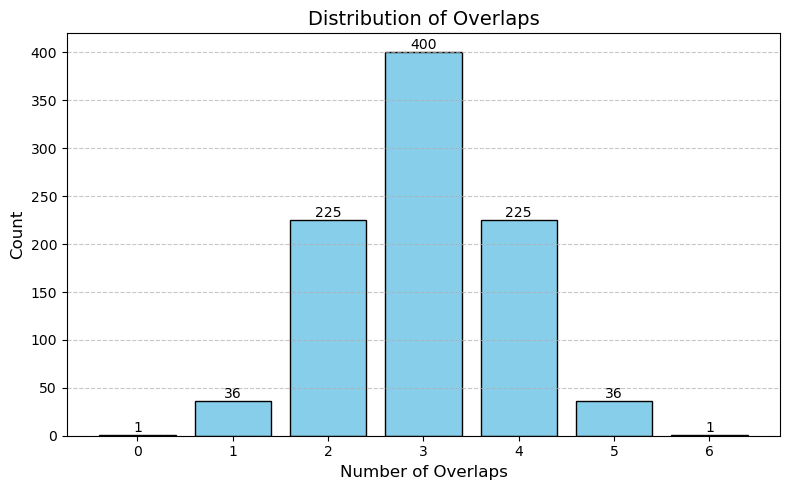

In [28]:
# Plotting the Numberso of possible overlapping
# source: https://how2matplotlib.com/how-to-annotate-bars-in-barplot-with-matplotlib.html


# Create a figure.
fig, ax = plt.subplots(figsize=(8, 5))

# Bar chart with custom colors.
bars = ax.bar(counts[0], counts[1], color='skyblue', edgecolor='black')

# Add percentage labels above the bars.
# https://realpython.com/python-zip-function/
for bar, count in zip(bars, counts[1]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{count}', ha='center', va='bottom')  # Corrected this line

# Add labels and title.
ax.set_xlabel('Number of Overlaps', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Overlaps', fontsize=14)
ax.set_xticks(counts[0])  # Ensure all x-tick labels are displayed
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines

# Show the plot.
plt.tight_layout()  # Optimize layout
plt.show()

According to the bar chart, there is only one combination out of 924 different combinations to select all 6 cups with milk first from a total of 12. To select at least 5 cups with milk first, there are 36 additional combinations, resulting in a total of 37 possibilities. This pattern continues for other overlap counts as well.

#### <span style="color: darkblue;">Calculate the probabilities </span>

Finally, we can calculate the probability of selecting from 0 to 6 cups with milk first in a selection of 6 cups from a group of 12 cups, with exactly 6 cups containing milk first. In this context:

- **0** means no cups with milk first are selected in the 6-cups sample out of 12.
- **6** means all 6 cups with milk first are selected in the 6-cups sample the 6-cups sample out of 12.

The probability of each possible outcome (ranging from 0 to 6 cups with milk first selected) is calculated by dividing the number of combinations for each outcome by the total number of combinations, which is 924 (the total number of ways to select 6 cups from 12).

The following code:

1. **Initializes an empty list**, selection_probability, to store the number of overlaps and their probabilities, along with a variable cumulative_overlapping set to 0.

2. **Loops through the counts** of overlaps in reverse [[]](https://www.w3schools.com/python/ref_func_reversed.asp) order:

    - For each overlap count, it updates the cumulative overlap.
    - It calculates the probability of selecting x cups with milk first by dividing the cumulative overlaps by the total number of combinations (ways).
    - It appends the result to the selection_probability list.

3. **Prepares the data** for tabulation [[]]( https://pypi.org/project/tabulate/) [[]](https://www.geeksforgeeks.org/printing-lists-as-tabular-data-in-python/) to display the cumulative probabilities more clearly using the tabulate function.

In [29]:
# Calculate cumulative probabilities for each number of cups with milk to be randomly selected 

# Initialize an array to store the number of overlaps and their probabilities
selection_probability = []
cumulative_overlapping = 0
number_of_cups = 6

# Calculate probabilities and store results in reverse order
# Source: https://www.w3schools.com/python/ref_func_reversed.asp
for i in reversed(counts[1]):  # Loop through the array in reverse
    cumulative_overlapping += i  # Update cumulative overlap count
    probability_cups_with_milk = cumulative_overlapping / ways  # Calculate probability
    selection_probability.append((number_of_cups, cumulative_overlapping, probability_cups_with_milk))  # Store as a tuple (count, probability)
    number_of_cups -= 1  # Decrease the cup count

# using tabulate to print the result in a readable format 
# https://pypi.org/project/tabulate/
# https://www.geeksforgeeks.org/printing-lists-as-tabular-data-in-python/

# Prepare data for tabulate
headers = ["Number of Cups", "Cumulative Overlaps", "Probability (%)"]
table = [(num_cups, cum_overlaps, f"{prob * 100:.2f}") for num_cups, cum_overlaps, prob in selection_probability]

# Print the results using tabulate
print(tabulate(table, headers=headers, tablefmt="rst"))


================  =====================  =================
  Number of Cups    Cumulative Overlaps    Probability (%)
================  =====================  =================
               6                      1               0.11
               5                     37               4
               4                    262              28.35
               3                    662              71.65
               2                    887              96
               1                    923              99.89
               0                    924             100
================  =====================  =================


As shown in the results, there is only a 0.11% chance of randomly selecting all 6 cups with milk first from a group of 12, without any specific capacity. However, if we allow for a possible error of 1, the probability of selecting at least 5 cups with milk first increases to around 4%. When considering the possibility of selecting at least 4 cups with milk first, the probability rises to 28.34%, providing a reasonable chance that a user, without any specific capacities, would mark this assumption as true.

We can visulalize the result for a better understanding. 

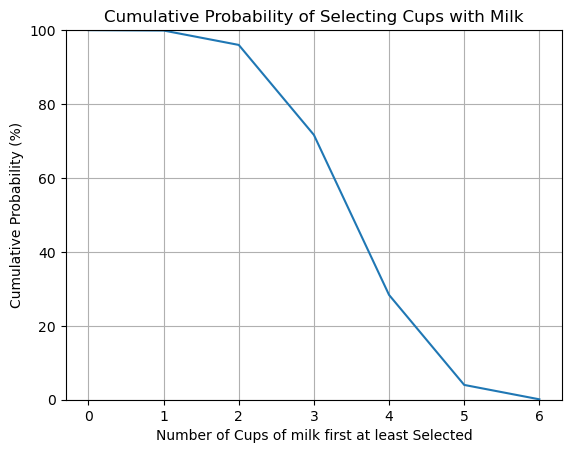

In [30]:
# Unpack the selection_probability list into separate lists
num_cups_list, cumulative_overlaps, probabilities = zip(*selection_probability)

# Convert probabilities to percentages for display purposes only (do not use for plotting)
probabilities_percentage = [prob * 100 for prob in probabilities]

# Plotting
plt.plot(num_cups_list, probabilities_percentage)
plt.title('Cumulative Probability of Selecting Cups with Milk')
plt.xlabel('Number of Cups of milk first at least Selected')
plt.ylabel('Cumulative Probability (%)')  # Update the ylabel to indicate percentage
plt.xticks(num_cups_list)  # Set x-ticks to the number of cups
plt.grid()
plt.ylim(0, 100)  # Set y-axis limits to show percentage range
plt.show()


#### **1.3: Conclusion** <a class="anchor" id="1.3"></a>


**1. Hypothesis: We accept the claim of a special ability if the user can accurately identify which of cups in the experiment had milk added first**

Considering the scenario where a user guesses, there is only a 0.11% probability of correctly identifying all 6 cups with milk first in a group of 12 (6 with milk first and 6 with tea first). If the user successfully identifies all 6 cups, we can confidently reject the null hypothesis that the person has no special ability to discern whether milk or tea was added first.

**2. Hypothesis: We accept the claim of a special ability if the user can accurately identify at least 5 out of 6 cups with milk first in a group of 12 cups.**

If we allow for one error in our hypothesis testing, the probability of guessing 5 or more cups correctly increases to about 4%. In many scientific fields, a common significance threshold is set at [0.05 (or 5%)[]](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/), indicating that a 5% chance of making a Type I error (rejecting a true null hypothesis) is generally considered acceptable.

<span style="color: darkred;">Therefore, I am inclined to reject the null hypothesis that any correct identification of the cups is purely due to random chance if the user correctly selects at least 5 cups with milk first out of the 6 chosen from a total of 12 cups, as this would provide sufficient evidence to support the claim of a special ability.</span>

### **Task 2: numpy's Normal Distribution** <a class="anchor" id="task2"></a>

---

**Task assignement**

>In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.
>
>Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.
>
>Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

##### **2.1: Generate a Random distribution with mean ith mean 10.0 and standard deviation 3.0** <a class="anchor" id="2.1"></a>

------

First we can import the needed libraries. 

In [31]:
# Numerical structures and operations.
# Importing numpy for numerical operations and random data generation
import numpy as np

# Plotting.
# Importing matplotlib for plotting the data
import matplotlib.pyplot as plt

# Importing scipy.stats for statistical distributions and tests
import scipy.stats as stats

# Importing statsmodels for statistical models and tests
import statsmodels.api as sm

The following code generates a random sample of 5000 values from a normal distribution using the [[] numpy.random.normal function](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html) . It works through the following steps:

- Sets the random seed (np.random.seed(100)) [[]](https://www.geeksforgeeks.org/random-seed-in-python/)to ensure that the random numbers generated are reproducible.
- Defines the mean (mu = 10.0) and standard deviation (sigma = 0.3) of the normal distribution.
- The function np.random.normal(mu, sigma, 5000) is called to generate 5000 random values that follow the normal distribution with the defined mean and standard deviation.
- The generated values are stored in the array s, which can then be used for further analysis or visualization.

In [32]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the parameters of the normal distribution
mu, sigma = 10.0, 0.3  # Mean (mu) and standard deviation (sigma)

# Generate a random sample of size 5000 from the normal distribution
# Ref: https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html
s = np.random.normal(mu, sigma, 5000)

# Print first 10 values of s distribution with better formatting
print("First 10 values of the generated sample 's':")
print("--------------------------------------------")
print(s[:10])

First 10 values of the generated sample 's':
--------------------------------------------
[10.14901425  9.95852071 10.19430656 10.45690896  9.92975399  9.92975891
 10.47376384 10.23023042  9.85915768 10.16276801]


The mean, calculated using the function [[] numpy.mean()](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), and the standard deviation, calculated using the function [[] numpy.std()](https://numpy.org/doc/stable/reference/generated/numpy.std.html), are computed from the randomly generated sample s to verify that these values match the initial parameters of the normal distribution.

In [33]:
# Calculate the mean using numpy.mean() 
# Ref: https://numpy.org/doc/stable/reference/generated/numpy.mean.html
mu_s = np.mean(s)

# Calculate the standard deviation using numpy.std() 
# Ref: https://numpy.org/doc/stable/reference/generated/numpy.std.html
sigma_s = np.std(s)

# Print the calculated mean and standard deviation
print(f"Calculated Mean (mu_s): {mu_s:.2f}")
print(f"Calculated Standard Deviation (sigma_s): {sigma_s:.2f}")

Calculated Mean (mu_s): 10.00
Calculated Standard Deviation (sigma_s): 0.30


As seen from the printed results, the calculated mean and standard deviation closely match the initial parameters (mu = 10.0 and sigma = 0.3) used to generate the normal distribution.


The following code, inspired by the [[] Applied Statistics course by Ian McLoughlin](https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/03_normal.ipynb), calculates the Probability Density Function (PDF) of a normal distribution for a sample s.

- **Generating the Range of x Values**: The code first generates an array of x values that span from 5 standard deviations below the mean to 5 standard deviations above the mean using the [[] np.linspace() function](https://numpy.org/doc/stable/reference/generated/numpy.linspace.htm). This wide range ensures the plot covers almost all of the distribution, in line with the 68-95-99 rule (approximately  99.7% data lies within 3 standard deviations of the mean, with nearly all data lying within 5 standard deviations). [[]](https://www.tutorialspoint.com/show-the-68-95-99-7-rule-in-statistics-using-python).

- **Defining the PDF Function**:A function is defined that takes in the x values, along with the mean and standard deviation of the distribution. This function uses the formula for the normal distribution to calculate the probability density at each value of x, effectively plotting the bell curve of the distribution.

- **Calculating the PDF**:Finally, the function computes the corresponding PDF values for each x in the range, producing a distribution curve that represents the probability of different outcomes within the s sample.

In [34]:
# Create an array of x values for plotting the PDF, covering ±5 standard deviations
#This ensure close to 100% of the normal distribution value will be in the x range.
x = np.linspace(mu_s - 5*sigma_s, mu_s + 5*sigma_s, 5000)

# Define the probability density function (PDF) for the normal distribution
def f(x, mu_s, sigma_s):
    # Calculate the normalization constant for the normal distribution
    norm = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    
    # Calculate the PDF values at each x using the formula for the normal distribution
    return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

# Get the corresponding y values (PDF) for the x values using the normal distribution function
pdf = f(x, mu, sigma)

To visualize a distribution effectively, we define a reusable function, **plot_normal_distribution**, which creates a combined plot showing both the histogram of a sample (**s**) and the probability density function (**PDF**) of a normal distribution based on the sample's properties.
Key Features:

- **Input**: The function takes the sample data (s), an array of x values, the corresponding pdf values, and customizable colors for the histogram and PDF curve.
- **Plotting**: The function uses [[a] matplotlib](https://matplotlib.org/) to plot the histogram of the sample with some [[] transparency (using the alpha parameter)](https://www.learningaboutelectronics.com/Articles/How-to-change-the-transparency-of-a-graph-plot-in-matplotlib-with-Python.php#:~:text=Matplotlib%20allows%20you%20to%20adjust%20the%20transparency%20of,then%20you%20can%20make%20alpha%20greater%20than%201.), and overlays the normal distribution's PDF curve on top for comparison. 
- **Customization**: The plot includes a title, axis labels, gridlines, and a vertical line marking the mean (mu) of the distribution.

The code is ispired by [[] Fitting a Normal distribution to 1D data](https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data).

In [35]:
# Define a function to plot the histogram of the sample and the PDF of the normal distribution
# The function takes in the sample data 's', the array of x values, the PDF values, and other customization parameters for the plot.
def plot_normal_distribution(s, x, pdf, col_hist, col_pdf, title):
    
    # Set up the style for the plot
    plt.style.use('seaborn-v0_8-darkgrid')

    # Create a new figure with specified size
    plt.figure(figsize=(10, 5))

    # Plot the histogram of the sample with some transparency
    plt.hist(s, bins=50, density=True, alpha=0.3, color=col_hist, edgecolor='black', label='Sample Histogram')

    # Plot the normal distribution PDF on top of the histogram
    plt.plot(x, pdf, color=col_pdf, linewidth=3, label='Normal Distribution PDF')

    # Set the title and axis labels
    plt.title(f'Histogram with PDF: {title}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Density', fontsize=14)

    # Add a legend to the plot
    plt.legend(fontsize=12)

    # Enable gridlines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Draw a vertical line at the mean (mu)
    plt.axvline(mu, color='green', linestyle='--', label='Mean', linewidth=2)

    # Display the plot
    plt.show()

Now, we can use the previously defined function **plot_normal_distribution** to visualize the distribution. The function takes the following arguments:

- **s**: The sample data, generated using np.random.normal.
- **x**: The range of x values over which the PDF is calculated.
- **"blue**": The color used for the histogram.
- **"red"**: The color used for the PDF curve.
- **title**="manually calculated": The title of the plot, indicating that the PDF was calculated by directly applying the mathematical formula.

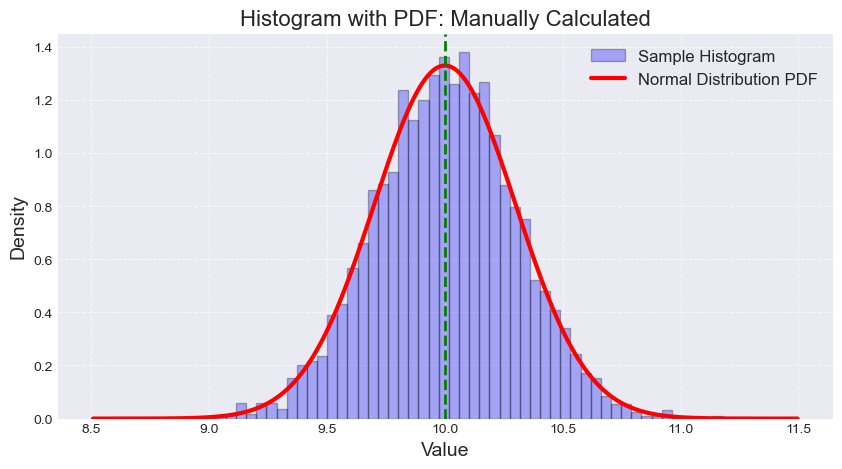

In [36]:
# Call the function to plot
plot_normal_distribution(s, x, pdf, "blue", "red", title="Manually Calculated")

Now, instead of manually calculating the PDF using the mathematical formula, we can do the same using the scipy.stats.norm.pdf function to compute the probability density function (PDF) of the normal distribution [](https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/). This function is part of the [[] SciPy library](https://scipy.org/), which offers efficient and reliable statistical functions for working with distributions.

[[] stats.norm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) is used to calculate the PDF of a normal distribution for a given range of x values. It takes the following arguments:

- x: The points at which the PDF is evaluated.
- mu_s: The mean of the distribution.
- sigma_s: The standard deviation of the distribution.

We can then plot the result using the previously defined **plot_normal_distribution**.

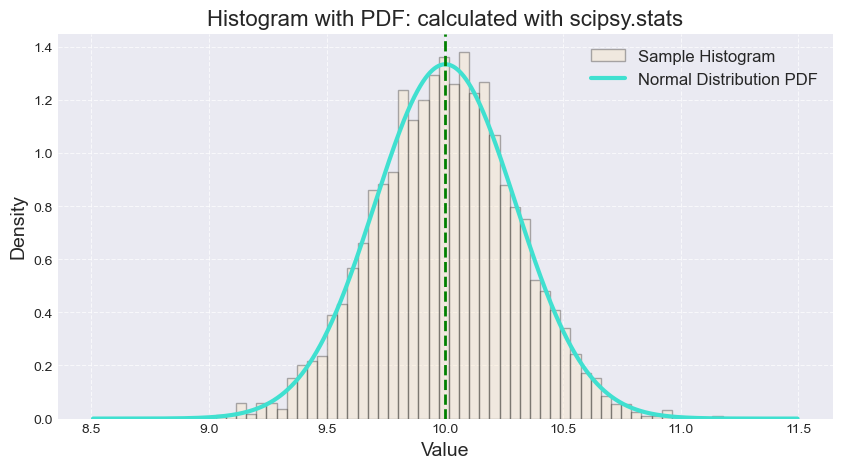

In [37]:
# same with scipsy stat norm pdf function 
# https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

# Calculate the PDF using scipy's norm function
pdf = stats.norm.pdf(x, mu_s, sigma_s)

# Call the function to plot
plot_normal_distribution(s, x, pdf, "moccasin", "turquoise", title="calculated with scipsy.stats")


##### **2.2: Perform the Shapiro-Wilk and Kolmogorov-Smirnov tests for normality** <a class="anchor" id="2.2"></a>

------

The **Shapiro-Wilk test** [[]](https://builtin.com/data-science/shapiro-wilk-test) is a statistical test used to assess whether a given dataset follows a normal distribution. It is commonly used for small sample sizes.

- **Null Hypothesis**: There is no evidence to reject the null hypothesis that the data is normally distributed.
- **Alternative Hypothesis**: The data does not follow a normal distribution.

The test produces a test statistic and a p-value. If the p-value is below a predefined significance level (often 0.05 [[]](https://community.jmp.com/t5/JMP-Knowledge-Base/How-do-I-interpret-the-Shapiro-Wilk-test-for-normality-in-JMP/ta-p/575365)), we reject the null hypothesis and conclude that the data is not normally distributed.

It is important to know that the Shapiro-Wilk test can produce false negatives (i.e., rejecting the null hypothesis when the data is actually normal) or false positives (i.e., failing to reject the null hypothesis when the data is not normal). For this reason, the use of other methods for checking normality, such as visualization techniques (e.g., histograms, Q-Q plots), is always advised.

The following code performs the Shapiro-Wilk test on the sample distribution s using the [[] stats.shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function to test for normality. The significance level is set at 0.05, and based on the p-value, the code prints the Shapiro-Wilk test statistic and p-value, followed by a decision on whether to reject or fail to reject the null hypothesis. 

If the p-value is less than 0.05, the null hypothesis (that the data follows a normal distribution) is rejected; otherwise, the null hypothesis is not rejected, suggesting the data may follow a normal distribution.

In [38]:
# perfom the shapiro test 
# https://www.statology.org/shapiro-wilk-test-python/

# Perform the Shapiro-Wilk test
shapiro_stat, p_value = stats.shapiro(s)

print(f'Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: the data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: the data may be normally distributed.")

Shapiro-Wilk Test Statistic: 0.9997
P-value: 0.5836
Fail to reject the null hypothesis: the data may be normally distributed.


As expected, the shapiro test result a p-value of 0.58 failing to reject the null hypotesis.

Another test that we can use to asses normality is the **Kolmogorov-Smirnov (K-S)test** [[]](https://www.statology.org/kolmogorov-smirnov-test-python/) [[]](https://pyshark.com/test-for-normality-using-python/#kolmogorov-smirnov-test-in-python). It tests whether the sample comes from a normal distribution by comparing the empirical cumulative distribution function (ECDF) of the sample with the cumulative distribution function (CDF) of a normal distribution. 

A significant p-value (below a threshold like 0.05) indicates that the sample likely does not follow a normal distribution.

The following code performs the Kolmogorov-Smirnov (K-S) test for normality using [[] stats.kstest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) from the SciPy library. The test compares the sample data (s) to a normal distribution ('norm'), with the mean (mu_s) and standard deviation (sigma_s) as parameters.

The significance level is set at 0.05. Based on the p-value, the code prints the test statistic and p-value, and then makes a decision on whether to reject or fail to reject the null hypothesis.

In [39]:
# Perform the Kolmogorov-Smirnov test for normality
ks_statistic, p_value = stats.kstest(s, 'norm', args=(mu_s, sigma_s))

# Output the results
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: the data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: the data may be normally distributed.")


KS Statistic: 0.0110
P-value: 0.5786
Fail to reject the null hypothesis: the data may be normally distributed.


### **Task 3: t-Test Calculation** <a class="anchor" id="task3"></a>

---

**Task assignement**

>Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.
>
>Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.
>
>**Dataset**:

| Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|------------|----|----|----|----|----|----|----|----|----|----|
| **Before** | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| **After**  | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

The provided dataset seems to meet the necessary requirements for conducting a dependent t-test. A dependent t-test compares the means between two related groups on the same continuous, dependent variable [[]](https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php). In this case, we can use the test to compare whether there is a difference in heart rates before and after the exercise program.

The necessary assumptions for conducting this test are as follows:

1. The dependent variable should be continuous.
2. The independent variable should consist of two categorical, "related groups" or "matched pairs."
3. There should be no significant outliers in the differences between the two related groups.
4. The distribution of the differences in the dependent variable between the two related groups should be approximately normal.

Regarding the first two assumptions, it is clear that they are satisfied, as the dataset describes heart rates for the same individuals (matched pairs) both before and after the exercise program.

To verify the third and fourth assumptions, we will use visualization techniques along with statistical tests [[]](https://medium.com/@marc.bolle/5-easy-ways-to-detect-outliers-in-python-b07639ba32d5). This combined approach will help us determine whether the assumptions are met and whether a dependent t-test can be conducted to assess whether there are substantial differences in the mean distribution of heart rates before and after the exercise program.

First we need to import the needed libraries and create a Pandas DataFrame [[]](https://www.geeksforgeeks.org/creating-a-pandas-dataframe/) [[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html), to store the heart rates of patients before and after a two-week exercise program.

In [40]:
# Importing numpy for numerical operations, especially for array manipulations
import numpy as np

# Importing scipy.stats for statistical functions, including t-tests
from scipy import stats

# Importing seaborn for creating statistical plots
import seaborn as sns

# Importing matplotlib.pyplot for general plotting (used for setting up figures and plotting)
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import shapiro

In [41]:
# Create a pandas dataframe containing the dataset
# https://www.geeksforgeeks.org/creating-a-pandas-dataframe/


# Create a dictionary with the data
data = {
    'Patient ID': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
    'Before': [63, 68, 70, 64, 74, 67, 70, 57, 66, 65], # Heart rates before the program
    'After': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63] # Heart rates after the program
}

# Create a DataFrame from the dictionary
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html
df_heart_rate = pd.DataFrame(data)

# Display the dataset
print(df_heart_rate)

   Patient ID  Before  After
0           0      63     64
1           1      68     64
2           2      70     68
3           3      64     64
4           4      74     73
5           5      67     70
6           6      70     72
7           7      57     54
8           8      66     61
9           9      65     63


##### **3.1: Visualizing Data with Histograms, Box Plots, Violin Plots, and Scatter Plots** <a class="anchor" id="3.1"></a>

------

To better understand if the two features of the dataset—heart rate before and heart rate after the exercise program—are similar or different and if the dependent test can be executed, we can first visualize their distributions using histograms. Histograms provide a way to observe the frequency distribution of data, and plotting both "before" and "after" heart rates allows us to visually compare the two distributions.

The following code does that using the [sns.histplot() function []](https://seaborn.pydata.org/generated/seaborn.histplot.html), with the optional use of a Kernel Density Estimate (KDE) curve, by setting [kde=Truev[]](https://docs.kanaries.net/topics/Seaborn/seaborn-displot), for a smoother representation of the data distribution and comparison. Specifically, the plt.subplots() function creates a figure with 3 subplots [[]](https://stackoverflow.com/questions/66730387/multiple-histograms-on-same-graph-with-seaborn-displot-not-distplot), allowing for different visualizations of the data, including individual histograms for "before" and "after" exercise heart rates, as well as an overlapping histogram for comparison [[]]( https://datavizpyr.com/overlapping-histograms-with-matplotlib-in-python/).

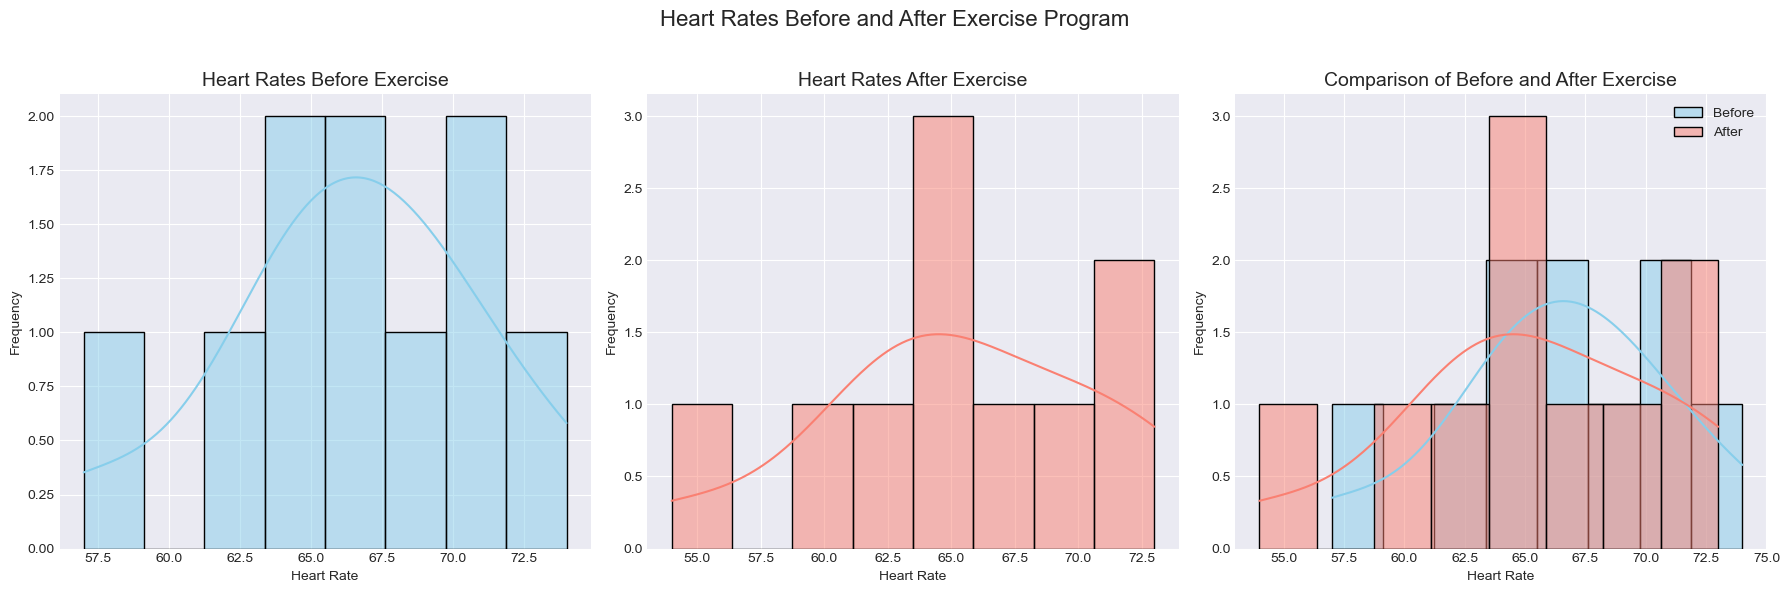

In [42]:
# Create histograms for heart rates before and after an exercise program.

# Set up the figure with 3 subplots in one row and adjust the figure size
# Ref 1: https://stackoverflow.com/questions/66730387/multiple-histograms-on-same-graph-with-seaborn-displot-not-distplot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Set the title for the entire figure
plt.suptitle('Heart Rates Before and After Exercise Program', fontsize=16)

# Plot 1: Histogram of heart rates before exercise
# Ref. 3: https://seaborn.pydata.org/generated/seaborn.histplot.html
# Ref. 4: https://docs.kanaries.net/topics/Seaborn/seaborn-displot
sns.histplot(df_heart_rate['Before'], kde=True, color='skyblue', bins=8, ax=axs[0], edgecolor='black')  # KDE for smoother curve
# Ref. 2: https://seaborn.pydata.org/generated/seaborn.histplot.html
axs[0].set_title('Heart Rates Before Exercise', fontsize=14)  # Title for the individual plot
axs[0].set_xlabel('Heart Rate')  # X-axis label for the plot
axs[0].set_ylabel('Frequency')  # Y-axis label for the plot

# Plot 2: Histogram of heart rates after exercise
sns.histplot(df_heart_rate['After'], kde=True, color='salmon', bins=8, ax=axs[1], edgecolor='black')  # KDE for smoother curve
axs[1].set_title('Heart Rates After Exercise', fontsize=14)  
axs[1].set_xlabel('Heart Rate')  
axs[1].set_ylabel('Frequency')  #

# Plot 3: Overlapping histogram (before and after)
# Ref. 4: https://datavizpyr.com/overlapping-histograms-with-matplotlib-in-python/
sns.histplot(df_heart_rate['Before'], kde=True, color='skyblue', bins=8, ax=axs[2], label='Before', edgecolor='black') 
sns.histplot(df_heart_rate['After'], kde=True, color='salmon', bins=8, ax=axs[2], label='After', edgecolor='black')  
axs[2].set_title('Comparison of Before and After Exercise', fontsize=14)  # Title for the individual plot
axs[2].set_xlabel('Heart Rate')  # X-axis label for the plot
axs[2].set_ylabel('Frequency')  # Y-axis label for the plot
axs[2].legend()  # Add a legend to differentiate the plots

# Adjust the layout to prevent overlapping of elements
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to leave space for the main title

# Show the plot
plt.show()


**Histograms observations**

>As we can see from the previous graphs, the distributions appear similar. However, we cannot conclusively determine >if they are truly similar or if there is a significant difference between the means of the two groups based solely >on visual inspection. Both distributions seem to lack outliers and appear to be normal. Based on the histograms, >there is no reason to reject the null hypothesis that the two distributions have similar means. Additionally, the >assumptions required to perform a dependent t-test appear to be satisfied.

Other ways to check if two features are equal and they have outliners are using strip plots, violin plots, and box plots:

1. *Strip Plot*: Displays individual data points [[]](https://pieriantraining.com/understanding-the-seaborm-stripplot-in-python/).
2. *Violin Plot*: Shows the distribution and density of data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side [[]](https://en.wikipedia.org/wiki/Violin_plot).
3. *Box Plot*: Summarizes the distribution through quartiles and medians, making it easy to compare central tendency and spread between features [[]](https://en.wikipedia.org/wiki/Box_plot).

This plots can help identify if the means of the two populations are equal by visually comparing their distributions. If the means are truly equal, we would expect the central tendency of the distributions to overlap or be very close to each other. However, if there is a significant difference between the means, the distributions will show a noticeable shift. 

I norder to create this graphs, the two features (before and after the exercise program) are first organized into a list format to facilitate visualization, as inspired by [ianmcloughlin_applied_statistics_04_t_test []](https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/04_t_tests.ipynb).

In [53]:
# Create a list of the data
data = [df_heart_rate['Before'], df_heart_rate['After']]

The following code, then, generates a 2x2 grid of subplots to visualize heart rates before and after an exercise program. First, it separately displays a strip plot [[]](https://datagy.io/seaborn-stripplot/), a box plot [[]](https://seaborn.pydata.org/generated/seaborn.boxplot.html) and a violin plot [[]](https://seaborn.pydata.org/generated/seaborn.violinplot.html), using the seaborn library, for each group (before and after the program). Finally, it overlays all three plots (strip, box, and violin) in a single graph to provide a better comparison of the distributions and central tendencies of the two groups.

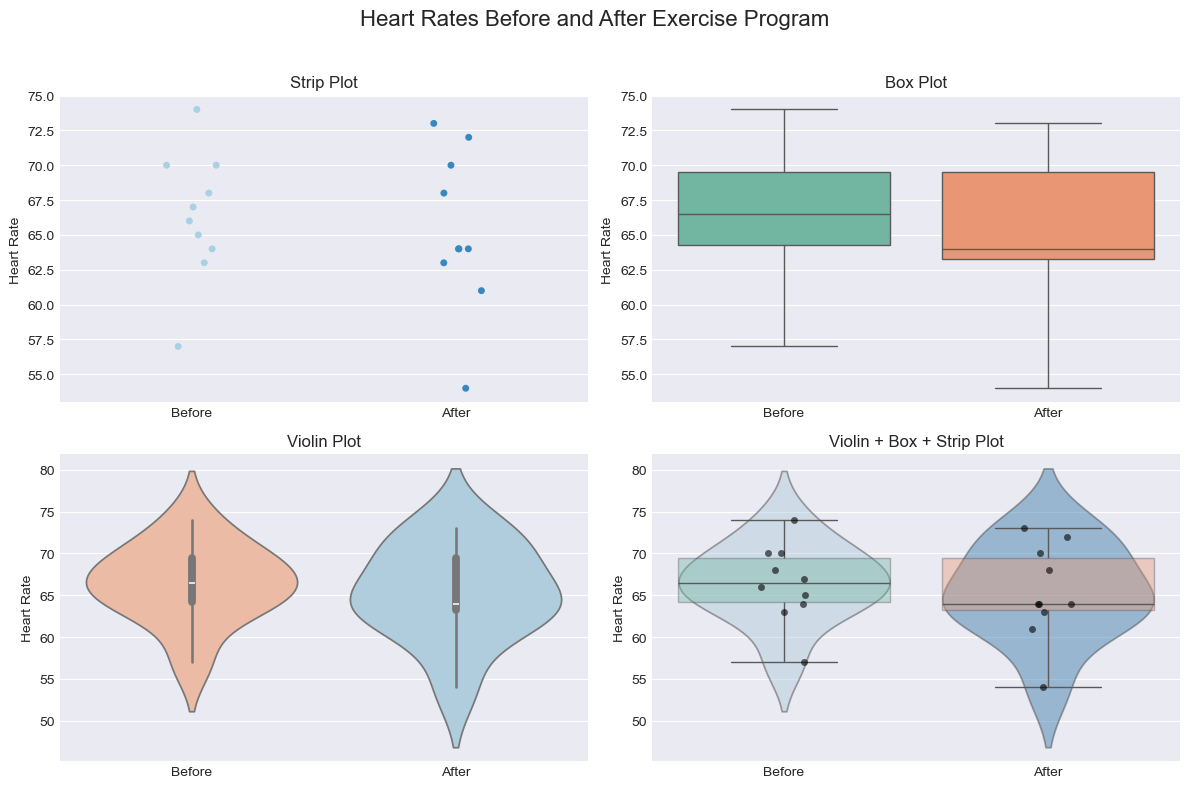

In [54]:
# Create box plot, violin plot, and scatter plot of the data and overlapping them for a better comparison 

# Set up the figure with 2x2 grid of subplots and adjust the figure size
# https://matplotlib.org/stable/users/explain/axes/axes_intro.html
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Creates a 2x2 grid of subplots with a figure size of 12x12 inches

# Set the title for the entire figure
plt.suptitle('Heart Rates Before and After Exercise Program', fontsize=16)  # Adds a title for the whole figure

# Plot 1: Strip plot
# https://datagy.io/seaborn-stripplot/
sns.stripplot(data=data, palette='Blues', ax=axs[0, 0])  # Creates a strip plot using the 'Blues' color palette for the data
axs[0, 0].set_title('Strip Plot', fontsize=12)  
axs[0, 0].set_ylabel('Heart Rate') 
axs[0, 0].set_xticks([0, 1])  # Set tick positions on the x-axis at 0 and 1
axs[0, 0].set_xticklabels(['Before', 'After'])  # Set custom labels for the x-axis ticks

# Plot 2: Box plot
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=data, palette='Set2', ax=axs[0, 1])  # Creates a box plot with 'Set2' color palette for the data
axs[0, 1].set_title('Box Plot', fontsize=12)  
axs[0, 1].set_ylabel('Heart Rate')  
axs[0, 1].set_xticks([0, 1])  
axs[0, 1].set_xticklabels(['Before', 'After'])  

# Plot 3: Violin plot
sns.violinplot(data=data, palette='RdBu', ax=axs[1, 0])  # Creates a violin plot with the 'RdBu' color palette
axs[1, 0].set_title('Violin Plot', fontsize=12)  
axs[1, 0].set_ylabel('Heart Rate')  
axs[1, 0].set_xticks([0, 1])  
axs[1, 0].set_xticklabels(['Before', 'After'])  

# Plot 4: Combined Violin, Box, and Strip Plot
# This plot combines all three types (Violin, Box, and Strip) for comparison
sns.violinplot(data=data, palette='Blues', ax=axs[1, 1], inner=None, alpha=0.5)  
sns.boxplot(data=data, palette='Set2', ax=axs[1, 1], 
            boxprops=dict(alpha=0.4))  
sns.stripplot(data=data, ax=axs[1, 1], color='black', alpha=0.6)  # Black color for a better visualization
axs[1, 1].set_title('Violin + Box + Strip Plot', fontsize=12)  # Title for the combined plot
axs[1, 1].set_ylabel('Heart Rate')  
axs[1, 1].set_xticks([0, 1])
axs[1, 1].set_xticklabels(['Before', 'After'])  

# Adjust the layout to prevent overlapping of elements and leave space for the main title
# https://stackoverflow.com/questions/66442402/matplotlib-with-fig-text-cropped
# https://datagy.io/seaborn-stripplot/
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to prevent overlapping and leave space for the title

# Show the plot
plt.show()

**Box Plots, Violin Plots and Strip Plots observations**

>Again, based on the plots above, the distributions appear similar and show no outliers. Therefore, there is no evidence to reject the null hypothesis that there is no significant difference between the means of the two related groups, and the distributions qualify to perform a dependent t-test.

##### **3.2: Outliers check using using IQR** <a class="anchor" id="3.2"></a>

------

A typical statistical test used to identify outliers is the Interquartile Range (IQR) [[]](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/) [[a]](https://medium.com/@marc.bolle/5-easy-ways-to-detect-outliers-in-python-b07639ba32d5) [[]](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/). The IQR is a measure of statistical dispersion that represents the range within which the central 50% of a dataset falls, and it is calculated as the difference between the third quartile (Q3) and the first quartile (Q1). 

By capturing the spread of the middle 50% of the data, the IQR helps define the "core" distribution of the dataset, making it useful for identifying outliers—values that fall outside the range $Q_1 - 1.5 \times \text{IQR}$ to $Q_3 + 1.5 \times \text{IQR}$.


In order to check for outliner using the IQR we first define a function **find_outliers(data_list)** that identifies outliers in a given dataset by calculating the first quartile (Q1) and third quartile (Q3) to determine the Interquartile Range (IQR), and then uses the IQR to calculate lower and upper bounds Any data points outside these boundsare returned as a list, along with the calculated lower and upper bounds. The code have been ispired by [Detect and Remove the Outliers using Python []](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)

In [45]:
# Function to detect outliers using the Interquartile Range (IQR)
# Ref: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

def find_outliers(data_list):
    # Calculate the first quartile (Q1) 
    Q1 = np.percentile(data_list, 25)
    
    # Calculate the third quartile (Q3) 
    Q3 = np.percentile(data_list, 75)
    
    # Calculate the Interquartile Range (IQR) as the difference between Q3 and Q1
    IQR = Q3 - Q1
    
    # Calculate the lower bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    
    # Calculate the upper bound for outliers
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers by checking if values in data_list are outside the lower or upper bounds
    outliers = [x for x in data_list if x < lower_bound or x > upper_bound]
    
    # Return the list of outliers, the lower bound, and the upper bound
    return outliers, lower_bound, upper_bound

We can then use the function on the *df_heart_rate['Before']* and *df_heart_rate['After']* columns to check for outliers and print the relevant results.

In [46]:
# Find outliers for 'Before' and 'After' heart rates
before_outliers, before_lower, before_upper = find_outliers(df_heart_rate['Before'])
after_outliers, after_lower, after_upper = find_outliers(df_heart_rate['After'])

# Print the results
print("Before heart rate data:")
print(f"Lower bound: {before_lower}")
print(f"Upper bound: {before_upper}")
print(f"Outliers: {before_outliers}")

print("\nAfter heart rate data:")
print(f"Lower bound: {after_lower}")
print(f"Upper bound: {after_upper}")
print(f"Outliers: {after_outliers}")


Before heart rate data:
Lower bound: 56.375
Upper bound: 77.375
Outliers: []

After heart rate data:
Lower bound: 53.875
Upper bound: 78.875
Outliers: []


As we can see, no outliers have been identified through the IQR test. Together with the previous visualizations of the two groups using histograms, boxplots, violin plots, and strip plots, we can conclude that the distributions satisfy the third assumption of no outliers, allowing us to proceed with conducting a dependent test.

##### **3.3: Testing for Normality of the Differences Between Related Groups with visualization techniques and a shapiro test** <a class="anchor" id="3.2"></a>

------

The final condition for conducting a dependent samples t-test on the data is that the distribution of the differences in the dependent variable between the two related groups should be approximately normal.

To check this, we first define a new variable as the differences between the two groups. We can then assess normality using visualization techniques, such as histograms and QQ plots. If there is no evidence to reject the null hypothesis that the differences are normally distributed, we can proceed to confirm normality with the Shapiro-Wilk test.

As first step we can calculate the difference between two columns in the DataFrame (df_heart_rate) and storing the result in a new column called 'Difference'.

In [47]:
# Assuming df_heart_rate is your DataFrame
df_heart_rate['Difference'] = df_heart_rate['After'] - df_heart_rate['Before']

We can now visualize the distribution of the 'Difference' using a QQ plot and a histogram. The code for the QQ plot is inspired by [ianmcloughlin_applied_statistics_03_normal []](https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/03_normal.ipynb). For the histogram, we'll use the histplot function from the Seaborn library, with the kde argument set to True. This will overlay a kernel density estimate (KDE) curve on the histogram to help with interpretation and provide a smoother view of the distribution.

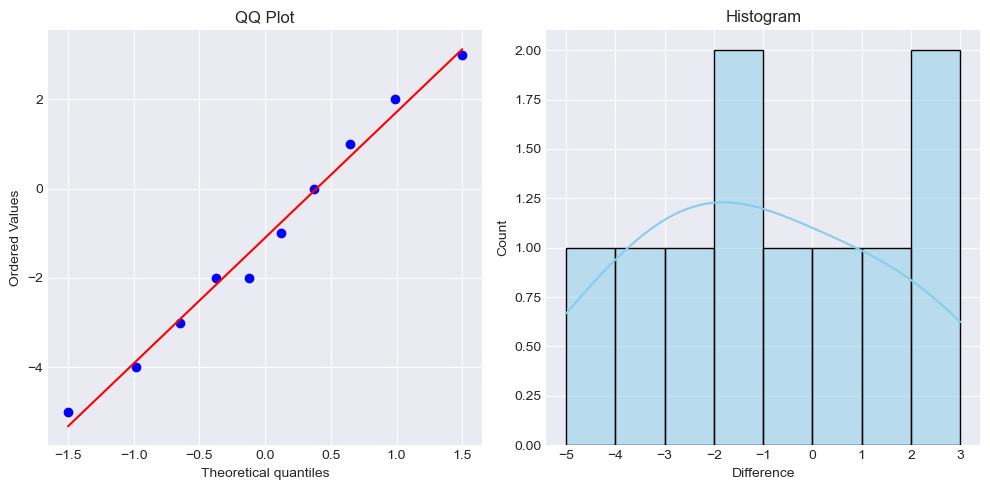

In [48]:
# Assuming df_heart_rate is your DataFrame and 'Difference' is a column
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create the first plot (Q-Q plot)
# https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/03_normal.ipynb
stats.probplot(df_heart_rate['Difference'], dist='norm', plot=axs[0])
axs[0].set_title('QQ Plot')

# Create the second plot (Histogram with KDE)
sns.histplot(df_heart_rate['Difference'], kde=True, color='skyblue', bins=8, edgecolor='black', ax=axs[1])
axs[1].set_title('Histogram')

plt.tight_layout()
plt.show()

Based on the QQ plot and the histogram, there is no evidence to suggest that the 'Difference' is not normally distributed.

Since the visualizations do not indicate a departure from normality, we can proceed by performing the **Shapiro-Wilk test** to formally confirm the normality of the distribution. We can use the *shapiro()* function from the *scipy.stats* library to conduct this test.

In [49]:
# Perform Shapiro-Wilk test for normality
from scipy.stats import shapiro

stat, p_value = shapiro(df_heart_rate['Difference'])
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

# Check if the p-value is greater than the significance level (e.g., 0.05)
if p_value > 0.05:
    print("The differences are approximately normally distributed (fail to reject the null hypotesis).")
else:
    print("The differences are not normally distributed (reject the null hypotesis).")

Shapiro-Wilk Test Statistic: 0.9752339025839641, p-value: 0.9346854448707635
The differences are approximately normally distributed (fail to reject the null hypotesis).


##### **3.3: Perform the paired-samples t-test** <a class="anchor" id="3.3"></a>

------

Now that we have demonstrated there is no evidence to reject the null hypothesis — that the two groups, df_heart_rate['After'] and df_heart_rate['Before'], do not have a significant difference in means — and the data meets the assumptions required for the paired-samples t-test, we can proceed with performing the test.

**Null hypothesis**: there is no significant difference between the means of the two related groups. 

The following code performs the paired t-test using the [ttest_rel() []](Thttps://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel) function from the scipy.stats library. The key result for this test is the p-value. If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no significant difference between the two groups. Conversely, if the p-value is less than or equal to 0.05, we reject the null hypothesis, suggesting a significant difference exists.

In [50]:
# Performing a paired t-test to compare heart rate measurements 'Before' and 'After' an intervention
# Thttps://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel

t_stat, p_value = stats.ttest_rel(df_heart_rate['Before'], df_heart_rate['After'])

# Print results in a readable format
print(f"P-value: {p_value:.4f}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a statistically significant difference between the 'Before' and 'After' heart rates.")
else:
    print("There is no statistically significant difference between the 'Before' and 'After' heart rates.")

P-value: 0.2140
There is no statistically significant difference between the 'Before' and 'After' heart rates.


As we can see, the-value is >0.05 suggesting that the null hypotesis cannot be rejectes and a possibility that there is no is no significant difference between the means of the two related groups. 

### **Task 4: ANOVA** <a class="anchor" id="task4"></a>

---

**Task assignement**

>In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.
>Now use a loop to perform the following test 10,000 times.
>
>1. Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.
>2. Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.
>
>Summarize and explain your results.

**The ANOVA test**

#### <span style="color: darkblue;">What it is and assumptions</span>

The one-way analysis of variance [(ANOVA) []](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php) is a statistical method used to determine if there are statistically significant differences between the means of two or more independent groups. While it can technically be applied to two groups, it is most commonly used when comparing three or more groups.

The one-way ANOVA is an <span style="color: darkred;">omnibus</span> test statistic used to evaluate whether there are statistically significant differences among group means. While it indicates if at least two group means differ, it does not specify which groups are significantly different. To identify these differences, post hoc tests are necessary, as they provide detailed pairwise comparisons.

For a one-way ANOVA to yield valid results, **six assumptions** must be met. These assumptions ensure the test's reliability and accuracy.

1. **Assumption 1**: <span style="color: darkred;">Dependent Variable Measuremen</span>. The dependent variable must be measured at the interval or ratio level, meaning it should be continuous. Examples of valid dependent variables include weight measured in kilograms.

2. **Assumption 2** <span style="color: darkred;">Independent Variable Structure</span>. The independent variable should consist of two or more categorical, independent groups. For instance, groups could represent different gender.ethnicities (e.g., Female and male).

3. **Assumption 3**: <span style="color: darkred;">Independence of Observation</span>. The observations in each group must be independent of one another, meaning there should be no relationship between participants in different groups. Each participant should belong to only one group.

4. **Assumption 4**: <span style="color: darkred;">No Significant Outliers</span>. Outliers are data points that significantly deviate from the typical pattern in the data. For instance, in a study measuring daily hours spent on exercise among students (with a mean of 5 hours), a student reporting 20 hours would be considered an outlier. Such a value could skew the results, making it appear that exercise has a greater impact than it actually does. 

5. **Assumption 5**: <span style="color: darkred;">Normal Distribution</span>. The dependent variable should be approximately normally distributed for each group. 

6. **Assumption 6**: <span style="color: darkred;">Homogeneity of Variances</span>. Also known as homoscedasticity, is an assumption that the variability (or spread) of scores in each group being compared is roughly equal. In other words, the variance (a measure of how spread out the scores are) should be similar across all groups. This assumption is important because one-way ANOVA is sensitive to unequal variances. When the variances are not equal, the results of the ANOVA test may not be valid, potentially leading to inaccurate conclusions


#### <span style="color: darkblue;">How One-Way ANOVA works</span>

The one-way **ANOVA** test works by comparing the variance (variability) within groups and between groups to determine if there are statistically significant differences in means [[]](https://www.statology.org/one-way-anova-by-hand/) [[]](https://www.cuemath.com/anova-formula/) [[]](https://medium.com/@Currie32/statistical-stories-anova-analysis-of-variance-0c924744c058) [[]](https://testbook.com/maths-formulas/anova-formula).

1. **State Hypotheses**:
   -  Null Hypothesis (H₀): All group means are equal.
   - A lternative Hypothesis (H₁): At least one group mean is different

2. **Calculate the Group Means**:  
   First, the mean of each group is calculated. These group means represent the average value of the dependent variable (e.g., test scores, weight) within each group (e.g., different treatments or categories).

3. **Calculate Total Variance (SST)**:  
   The overall mean is the average of all data points combined, regardless of which group they belong to. The total variance in the data is calculated by finding the sum of squared differences between each data point and the overall mean of all data points combined.

5. **Calculate Between-Group Variance (SSB)**:  
   This measures how much the group means differ from the overall mean. If the group means are far apart from the overall mean, this suggests that the groups are different from each other.

6. **Calculate Within-Group Variance (SSW)**:  
   This measures the variability of data points within each group, essentially looking at how much individual data points deviate from their respective group means. If the data points within groups are highly spread out, the within-group variance will be large.

7. **F-statistic Calculation**:  
   The F-statistic is the ratio of the between-group variance to the within-group variance:

   $ F = \frac{MSB}{MSW} $

   where: $ MSB = \frac{SSB}{df_{\text{between}}} = \frac{\sum n_j (\bar{X}_j - \bar{X})^2}{df_{\text{between}}} $

   and $ MSW = \frac{SSW}{df_{\text{within}}} = \frac{\sum \sum (X_{ij} - \bar{X}_j)^2}{df_{\text{within}}}$
   

8. **Degrees of Freedom**:  
The F-statistic is adjusted using degrees of freedom, which represent the number of independent values used in the calculation:

   Degrees of Freedom:

   $ df_{\text{between}} = k - 1 \quad \text{(where } k \text{ is the number of groups)} $
   
   $ df_{\text{within}} = N - k \quad \text{(where } N \text{ is the total number of observations)} $

9. **Comparison to Critical Value**:  
   The calculated F-statistic is compared to a critical value from the F-distribution table based on the degrees of freedom. If the calculated F-statistic exceeds the critical value, it indicates that the differences between the group means are statistically significant.

9. **P-value**:  
   Alternatively, the p-value associated with the F-statistic can be used. If the p-value is smaller than the chosen significance level (usually 0.05), we reject the null hypothesis. This suggests that there is a statistically significant difference between the group means.

10. **Post-Hoc Tests**:  
   If the ANOVA result is significant (i.e., we reject the null hypothesis), post-hoc tests (such as Tukey's HSD) are needed to determine which specific groups differ from one another. These tests perform pairwise comparisons and control for the overall error rate when testing multiple group differences.

<div style="text-align:center;">
 <img src="image/one-way-ANOVA-formulas.png" width="700">
</div>

<div style="text-align:center;">
  <a href="https://testbook.com/maths-formulas/anova-formula"><i>[Fig. 1] - Anova Formula</i></a>
</div>

In [1]:
# Import the needed libraries 

import numpy as np
from scipy import stats


#### <span style="color: darkblue;">Introduction to the experiment</span>

In this experiment, we will simulate the process of generating three samples, each with slightly different means (4.9, 5.0, and 5.1) and the same standard deviation (0.1), and perform a one-way ANOVA test 10,000 times.

Given that the groups are generated with means that are very close to each other (within 0.2 units) and with a relatively small standard deviation, we expect that the three groups will be statistically similar. The small differences in the means (4.9, 5.0, and 5.1) are not large enough to cause significant differences that would lead us to reject the null hypothesis. Therefore, based on the design of the experiment, we expect the ANOVA to show no significant difference between the groups.

The primary objective of this simulation is to calculate how frequently a Type II error occurs when performing an ANOVA test. A Type II error happens when the statistical test fails to reject the null hypothesis, even though there is a real difference between the groups.[[]](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/).

**Null Hypothesis (H₀)**: There is no difference between the means of the three groups (i.e., their means are equal).

**Alternative Hypothesis (H₁)**: There is a significant difference between the means of at least one of the groups.

We will assume a significance level (alpha, α) of 0.05. This means we are willing to accept a 5% chance of incorrectly rejecting the null hypothesis when it is actually true (this would be a Type I error). If the p-value is smaller than 0.05, we reject H₀ (i.e., we conclude that there is a statistically significant difference between the group means). If the p-value is greater than 0.05, we fail to reject H₀ (i.e., we conclude that there is no statistically significant difference).

Given the very small differences in the means (4.9, 5.0, and 5.1), we expect the test to fail to reject the null hypothesis most of the time. However, it is possible that random variation might occasionally lead to statistical differences between the groups. If, in such cases, the ANOVA test fails to reject the null hypothesis despite these small differences, we would have a Type II error.

Our goal is to measure how frequently Type II errors occur by calculating the percentage of times the ANOVA test fails to detect a significant difference between the group means, even though there are small but real differences. Although the samples are generated with the assumption that they should have similar distributions, random variation can still cause slight differences between them. If this happens, and the ANOVA test fails to detect these differences (i.e., fails to reject the null hypothesis), a Type II error occurs.


#### <span style="color: darkblue;">Introduction to the experiment</span>

In this experiment, we will simulate the process of generating three samples, each with slightly different means (4.9, 5.0, and 5.1) and the same standard deviation (0.1), and perform a one-way ANOVA test 10,000 times.

Given that the means are very close to each other (within 0.2 units) and the standard deviation is relatively small, we expect the groups to be statistically similar. The differences in the means are unlikely to be large enough to lead to a significant result that would cause us to reject the null hypothesis. Therefore, we anticipate that the ANOVA test will show no significant difference between the groups.

The primary objective of this simulation is to calculate the frequency of Type II errors when performing an ANOVA test. A Type II error occurs when the test fails to reject the null hypothesis, even though a real difference between the groups exists.

**Null Hypothesis (H₀)**: There is no difference between the means of the three groups (i.e., their means are equal).

#### <span style="color: darkblue;"> Type II error and significant level α</span>

We will use a significance level (alpha, α) of 0.05, meaning we are willing to accept a 5% chance of incorrectly rejecting the null hypothesis (a Type I error). If the p-value is smaller than 0.05, we reject H₀, concluding that there is a statistically significant difference between the group means. If the p-value is greater than 0.05, we fail to reject H₀, concluding that there is no significant difference.

Given the very small differences between the group means (4.9, 5.0, and 5.1), we expect that the ANOVA test will fail to reject the null hypothesis most of the time. However, random variation can still cause slight differences between the groups. If such differences occur, and the ANOVA test fails to detect them (i.e., it fails to reject the null hypothesis), a Type II error will occur.

Our goal is to measure how frequently Type II errors occur by calculating the percentage of times the ANOVA test fails to detect significant differences between the group means, even though there are small but real differences. Although we assume that the samples are generated to have similar distributions, random variation can cause differences between them. When this happens, and the ANOVA test does not detect the differences (i.e., it fails to reject the null hypothesis), a Type II error is committed.

<div style="text-align:center;">
 <img src="image\type-i-and-ii-error-2.png" width="700">
</div>

<div style="text-align:center;">
  <a href="https://www.scribbr.com/statistics/type-i-and-type-ii-errors/"><i>[Fig. 2] - Type I and Type II Error </i></a>
</div>

#### <span style="color: darkblue;">Check the assumption to perform the ANOVA test</span>

As previously explained, the one-way ANOVA test has <span style="color: darkred;">6 assumptions</span>. However, since the three distributions will be normally generated with predefined parameters, <span style="color: darkred;">we can assume that all six assumptions are met</span>.

- **Assumption 1**: The generated variable will be continuous, as it comes from normal distributions.
- **Assumption 2**: The independent variable will consist of three categorical groups, each representing a distribution separately and independently generated from the others.
- **Assumption 3**: Observations will be independent, as each distribution is generated separately.
- **Assumption 4**: There will be no significant outliers, as the standard deviation is set to 0.1.
- **Assumption 5**: The distributions will be normal, as `np.random.normal` is used to generate them.
- **Assumption 6**: Finally, there will be homogeneity of variances, as all distributions have the same standard deviation.

#### <span style="color: darkblue;">Execution of the experiment</span>

As per the task requirement as a first we generate the variable to count Type II errors and set it to 0.

In [10]:
# Initialize the variable to count Type II errors
no_type_ii = 0

We can now set a number of parameters that will be used in the next for loop. 

In [3]:
# Parameters
mean_1, mean_2, mean_3 = 4.9, 5.0, 5.1
std_dev = 0.1
sample_size = 100
iterations = 10000
alpha = 0.05  # significance level

In [9]:
# Run the loop for the number of iterations
for _ in range(iterations):
    # Generate three samples with specified means and standard deviations
    sample_1 = np.random.normal(mean_1, std_dev, sample_size)
    sample_2 = np.random.normal(mean_2, std_dev, sample_size)
    sample_3 = np.random.normal(mean_3, std_dev, sample_size)
    
    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(sample_1, sample_2, sample_3)
    
    # Check for Type II error (fail to reject the null hypothesis)
    if p_value > alpha:
        no_type_ii += 1

# Estimate the probability of committing a Type II error
probability_type_ii = no_type_ii / iterations

# Final print statement with more detailed results
print(f"Out of {iterations} iterations, a Type II error occurred {no_type_ii} times.")
print(f"This gives an estimated probability of committing a Type II error of {probability_type_ii * 100:.2f}%.\n")

Out of 10000 iterations, a Type II error occurred 0 times.
This gives an estimated probability of committing a Type II error of 0.00%.

